In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('homeprices.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:2])
X[:, 1:2] = imputer.transform(X[:, 1:2])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X = pca.fit_transform(X)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_poly)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y.reshape(len(y),1)),1))

[[547543.55 550000.  ]
 [584147.5  565000.  ]
 [584034.85 610000.  ]
 [608954.93 595000.  ]
 [750126.17 760000.  ]
 [815192.99 810000.  ]]


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.9770540419709072


In [ ]:
y_predicted = lin_reg.predict(poly_reg.fit_transform(pca.transform([[3000, 6, 28]])))
print(y_predicted)

[584146.75]


NameError: name 'predicting' is not defined

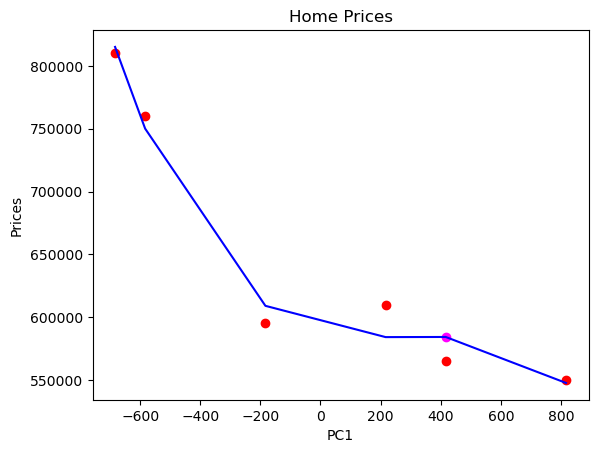

In [ ]:
training = plt.scatter(X, y, color = 'red')
predicting1 = plt.scatter(pca.transform([[3000, 6, 28]]), y_predicted, color = 'magenta')
plt.plot(X, y_pred, color = 'blue')
plt.title('Home Prices')
plt.xlabel('PC1')
plt.ylabel('Prices')
plt.legend((training, predicting), ('Training set points', 'Predicting a Price'))
plt.show()

In [ ]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06, 23388.88, -3231.72])

In [ ]:
reg.intercept_ 

221323.00186540408

In [ ]:
m1 = 112.06244194 
m2 = 23388.88007794
m3 = -3231.71790863
b = 221323.00186540443
price = m1*3000 + m2*3 + m3*40 + b # Equation of Multivariate Regression
price

498408.25157402444

In [ ]:
reg.predict([[3000,3,40]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25])

In [ ]:
reg.score(df[['area','bedrooms','age']],df.price)

0.9550196399325818

In [ ]:
reg.predict([[3500, 3, 40]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([554439.47])

In [ ]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

In [ ]:
reg.predict([[2800, 14, 5]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([846383.57])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd
        


In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])